**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [3]:
pd.__version__

'1.5.3'

In [4]:
np.__version__

'1.24.2'

## Creating a Sample Dataframe

**Generating Names**

In [5]:
first = ['Alex','Harry','Hannah','Charlie','Emma','Emily','Anastasia','Mac','Joe','Harold']
last = ['James','Clarkson','Chalamet','Roland','Tomlinson','Payne','Steele','Grey','Robertson','Miller']

# combination
names = []
for i in first:
    for j in last:
        name = i+' '+j
        names.append(name)

print(np.random.shuffle(names))

None


**Generating Countries**

In [6]:
countries = ['America','England','Wales','Ireland','Scotland','India','Emirates','Pakistan','Palestine','Egypt']

**Generating Dates**

In [7]:
def random_date(start, end):
    delta = end - start
    random_days = np.random.randint(0, delta.days)
    return start + timedelta(days=random_days)

random_date(datetime(1960,1,1),datetime(2012,12,31))

datetime.datetime(1986, 5, 25, 0, 0)

**Generating a Dataframe**

In [8]:
num_rows = 500
np.random.seed(454)

data = {
    'ID': list(range(100_001,100_000+num_rows+1)),
    'Name': [np.random.choice(names) for _ in range(num_rows)],
    'Age': [np.random.randint(20, 80) for _ in range(num_rows)],
    'Gender': [np.random.choice(['Male','Female']) for _ in range(num_rows)],
    'Country': [np.random.choice(countries) for _ in range(num_rows)],
    'Height': [np.random.uniform(150, 200) for _ in range(num_rows)],
    'Weight': [np.random.uniform(50, 100) for _ in range(num_rows)],
    'IsStudent': [np.random.choice([True,False]) for _ in range(num_rows)],
    'Score': [np.int32(np.random.normal(100, 15)) for _ in range(num_rows)],
    'Grade': [np.random.choice(['A','B','C','D','E','F']) for _ in range(num_rows)],
    'Birthdate': [random_date(datetime(1960,1,1),datetime(2012,12,31)) for _ in range(num_rows)],
}

In [9]:
test_df = pd.DataFrame(data)
test_df.head()

,ID,Name,Age,Gender,Country,Height,Weight,IsStudent,Score,Grade,Birthdate
0,100001,Joe Steele,63,Female,Pakistan,166.243390,94.961548,False,110,D,1973-08-31
1,100002,Emma Payne,43,Female,Scotland,153.720175,51.508408,True,106,E,1970-10-13
2,100003,Charlie Steele,21,Female,Ireland,163.968037,70.602036,True,79,A,1972-06-20
3,100004,Emily Steele,60,Female,Emirates,172.111597,69.342162,True,73,F,1984-10-17
4,100005,Emma Chalamet,39,Male,Ireland,182.232617,56.874504,False,77,C,1998-05-08


---

# Pandas

[Pandas Docs](https://pandas.pydata.org/docs/index.html#)

Pandas is a popular open-source Python library designed to provide easy-to-use data structures and data analysis tools. It serves as a powerful and flexible tool for handling structured data, making it a go-to choice for data manipulation, cleaning, and exploration in data science and analysis projects. At its core, Pandas utilizes two primary data structures: Series (1-dimensional labeled array) and DataFrame (2-dimensional labeled tabular data structure). Under the hood, Pandas leverages the NumPy library for efficient numerical computations, which makes it capable of handling large datasets with high performance. Pandas allows users to perform a wide range of operations, such as filtering, grouping, merging, reshaping, and more, making it an indispensable tool for working with structured data in Python.

## Creating Dataframes

In [46]:
# from dictionary of lists
data = {
    'name': ['James','Jackson','Miley','Janet','Kulsum'],
    'age': [17,13,25,24,19],
    'country': ['USA','London','Canada','Georgia','India'],
    'occupation': ['student','student','artist','nurse','doctor'],
}

df = pd.DataFrame(data)
df.head()

,name,age,country,occupation
0,James,17,USA,student
1,Jackson,13,London,student
2,Miley,25,Canada,artist
3,Janet,24,Georgia,nurse
4,Kulsum,19,India,doctor


In [11]:
# from csv
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Head Stats of Dataframes**

In [12]:
test_df.shape

(500, 11)

In [13]:
test_df.size

5500

In [14]:
test_df.max()

ID                        100500
Name               Mac Tomlinson
Age                           79
Gender                      Male
Country                    Wales
Height                199.978274
Weight                 99.979124
IsStudent                   True
Score                        145
Grade                          F
Birthdate    2012-12-22 00:00:00
dtype: object

In [15]:
test_df.mean()

C:\Users\dzuz1\AppData\Local\Temp\ipykernel_18996\4222264495.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  test_df.mean()
C:\Users\dzuz1\AppData\Local\Temp\ipykernel_18996\4222264495.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df.mean()


ID           100250.500000
Age              49.494000
Height          175.602516
Weight           74.269041
IsStudent         0.486000
Score            99.458000
dtype: float64

In [16]:
test_df.min()

ID                        100001
Name               Alex Chalamet
Age                           20
Gender                    Female
Country                  America
Height                150.138774
Weight                 50.198033
IsStudent                  False
Score                         57
Grade                          A
Birthdate    1960-02-06 00:00:00
dtype: object

In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         500 non-null    int64         
 1   Name       500 non-null    object        
 2   Age        500 non-null    int64         
 3   Gender     500 non-null    object        
 4   Country    500 non-null    object        
 5   Height     500 non-null    float64       
 6   Weight     500 non-null    float64       
 7   IsStudent  500 non-null    bool          
 8   Score      500 non-null    int32         
 9   Grade      500 non-null    object        
 10  Birthdate  500 non-null    datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(2), int32(1), int64(2), object(4)
memory usage: 37.7+ KB


In [18]:
test_df.dtypes

ID                    int64
Name                 object
Age                   int64
Gender               object
Country              object
Height              float64
Weight              float64
IsStudent              bool
Score                 int32
Grade                object
Birthdate    datetime64[ns]
dtype: object

In [19]:
test_df.describe()

,ID,Age,Height,Weight,Score
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,100250.500000,49.494000,175.602516,74.269041,99.458000
std,144.481833,17.462756,14.384240,14.624183,14.978282
min,100001.000000,20.000000,150.138774,50.198033,57.000000
25%,100125.750000,34.000000,163.219232,61.809619,90.000000
50%,100250.500000,50.000000,175.996160,73.054606,100.000000
75%,100375.250000,65.000000,188.758492,87.742110,110.000000
max,100500.000000,79.000000,199.978274,99.979124,145.000000


In [20]:
test_df.nunique()

ID           500
Name          97
Age           60
Gender         2
Country       10
Height       500
Weight       500
IsStudent      2
Score         74
Grade          6
Birthdate    495
dtype: int64

## Accessing the Dataframe

**Accessing Columns**

In [21]:
test_df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Country', 'Height', 'Weight',
       'IsStudent', 'Score', 'Grade', 'Birthdate'],
      dtype='object')

In [22]:
test_df['Age']

0      63
1      43
2      21
3      60
4      39
       ..
495    39
496    36
497    54
498    26
499    74
Name: Age, Length: 500, dtype: int64

In [23]:
test_df[['Name','Grade']]

,Name,Grade
0,Joe Steele,D
1,Emma Payne,E
2,Charlie Steele,A
3,Emily Steele,F
4,Emma Chalamet,C
...,...,...
495,Hannah Grey,F
496,Emma Roland,E
497,Emily Chalamet,A
498,Charlie Steele,C


In [24]:
# iloc[row_no,column_no] - integer location
test_df.iloc[:,1:]

,Name,Age,Gender,Country,Height,Weight,IsStudent,Score,Grade,Birthdate
0,Joe Steele,63,Female,Pakistan,166.243390,94.961548,False,110,D,1973-08-31
1,Emma Payne,43,Female,Scotland,153.720175,51.508408,True,106,E,1970-10-13
2,Charlie Steele,21,Female,Ireland,163.968037,70.602036,True,79,A,1972-06-20
3,Emily Steele,60,Female,Emirates,172.111597,69.342162,True,73,F,1984-10-17
4,Emma Chalamet,39,Male,Ireland,182.232617,56.874504,False,77,C,1998-05-08
...,...,...,...,...,...,...,...,...,...,...
495,Hannah Grey,39,Female,Egypt,176.086634,71.101187,False,100,F,1974-03-07
496,Emma Roland,36,Female,India,165.000010,58.546812,True,105,E,1976-11-18
497,Emily Chalamet,54,Male,Palestine,172.117941,71.395512,False,86,A,1984-12-16
498,Charlie Steele,26,Male,Wales,154.005757,60.575895,False,111,C,2001-10-04


In [25]:
# loc[row_no,column_name] 
test_df.loc[:,'Age':]

,Age,Gender,Country,Height,Weight,IsStudent,Score,Grade,Birthdate
0,63,Female,Pakistan,166.243390,94.961548,False,110,D,1973-08-31
1,43,Female,Scotland,153.720175,51.508408,True,106,E,1970-10-13
2,21,Female,Ireland,163.968037,70.602036,True,79,A,1972-06-20
3,60,Female,Emirates,172.111597,69.342162,True,73,F,1984-10-17
4,39,Male,Ireland,182.232617,56.874504,False,77,C,1998-05-08
...,...,...,...,...,...,...,...,...,...
495,39,Female,Egypt,176.086634,71.101187,False,100,F,1974-03-07
496,36,Female,India,165.000010,58.546812,True,105,E,1976-11-18
497,54,Male,Palestine,172.117941,71.395512,False,86,A,1984-12-16
498,26,Male,Wales,154.005757,60.575895,False,111,C,2001-10-04


In [26]:
# counting each category in select column
test_df['Grade'].value_counts()

D    86
E    86
B    86
A    85
F    81
C    76
Name: Grade, dtype: int64

In [27]:
test_df['Height'].count()

500

**Accessing Rows**

In [28]:
test_df.index

RangeIndex(start=0, stop=500, step=1)

In [29]:
test_df['Age'][4:]

4      39
5      70
6      71
7      58
8      23
       ..
495    39
496    36
497    54
498    26
499    74
Name: Age, Length: 496, dtype: int64

In [30]:
# iloc[row_no,column_no] - integer location
test_df.iloc[[0,3]]

,ID,Name,Age,Gender,Country,Height,Weight,IsStudent,Score,Grade,Birthdate
0,100001,Joe Steele,63,Female,Pakistan,166.243390,94.961548,False,110,D,1973-08-31
3,100004,Emily Steele,60,Female,Emirates,172.111597,69.342162,True,73,F,1984-10-17


In [31]:
# loc[row_no,column_name] 
test_df.loc[3:68:4,'Name'::2]

,Name,Gender,Height,IsStudent,Grade
3,Emily Steele,Female,172.111597,True,F
7,Harold Tomlinson,Male,153.613770,False,A
11,Joe Robertson,Male,165.748438,False,D
15,Charlie Roland,Male,189.377088,False,D
19,Mac Tomlinson,Female,187.137879,True,B
23,Charlie Payne,Male,159.558240,True,B
27,Emma Chalamet,Female,183.319050,True,B
31,Harold Grey,Female,168.617388,True,C
35,Anastasia Chalamet,Female,181.450480,True,A
39,Emma Grey,Male,195.868695,False,B


## Indexes

**Setting Index When Loading Dataframe**

In [32]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url,index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Setting Index After Dataframe Creation**

In [33]:
test_df.set_index('ID',inplace=True)

**Reseting Index**

In [34]:
test_df.reset_index(inplace=True)

## Filtering

**Filter Mask**

In [35]:
filt = test_df['Age'] >= 65
test_df[filt]

,ID,Name,Age,Gender,Country,Height,Weight,IsStudent,Score,Grade,Birthdate
5,100006,Anastasia Miller,70,Female,India,184.206148,67.903782,True,100,B,1996-09-11
6,100007,Emma Miller,71,Female,Egypt,177.674553,68.833134,True,93,A,2002-02-14
11,100012,Joe Robertson,74,Male,Palestine,165.748438,72.052022,False,86,D,1983-01-14
13,100014,Emma James,79,Female,America,164.864794,82.522556,False,100,B,1984-07-19
20,100021,Emma Robertson,78,Male,America,189.325500,98.428206,False,124,B,1978-03-01
...,...,...,...,...,...,...,...,...,...,...,...
485,100486,Anastasia Grey,68,Male,Emirates,158.174840,68.441032,False,90,B,1967-01-08
490,100491,Mac Tomlinson,67,Female,Ireland,170.721938,85.892548,True,118,C,1997-05-05
492,100493,Hannah Steele,68,Female,Ireland,158.203885,51.678642,True,94,D,1969-04-10
494,100495,Emma James,75,Male,Emirates,192.887561,50.618409,True,108,C,1996-08-22


In [36]:
filt = (test_df['Height'] >= 190) & (test_df['Weight'] < 60)
test_df.loc[~filt, 'Grade']

0      D
1      E
2      A
3      F
4      C
      ..
495    F
496    E
497    A
498    C
499    F
Name: Grade, Length: 480, dtype: object

In [37]:
filt = test_df['Name'].str.contains('Steele')
test_df[filt]

,ID,Name,Age,Gender,Country,Height,Weight,IsStudent,Score,Grade,Birthdate
0,100001,Joe Steele,63,Female,Pakistan,166.243390,94.961548,False,110,D,1973-08-31
2,100003,Charlie Steele,21,Female,Ireland,163.968037,70.602036,True,79,A,1972-06-20
3,100004,Emily Steele,60,Female,Emirates,172.111597,69.342162,True,73,F,1984-10-17
16,100017,Charlie Steele,39,Male,India,191.983028,74.491490,False,109,F,1960-02-06
21,100022,Joe Steele,76,Male,Pakistan,165.296431,85.257573,True,93,D,1967-03-16
...,...,...,...,...,...,...,...,...,...,...,...
476,100477,Joe Steele,61,Male,Scotland,173.266747,98.200698,True,115,F,1971-09-11
480,100481,Charlie Steele,71,Female,Wales,161.831288,82.574820,True,71,D,2002-05-22
487,100488,Mac Steele,23,Male,Emirates,174.850667,70.591234,True,112,C,1967-02-21
492,100493,Hannah Steele,68,Female,Ireland,158.203885,51.678642,True,94,D,1969-04-10


## Modifying Dataframe

**Renaming Column Names**

In [38]:
test_df.columns = [x.lower() for x in test_df.columns]
test_df.head()

,id,name,age,gender,country,height,weight,isstudent,score,grade,birthdate
0,100001,Joe Steele,63,Female,Pakistan,166.243390,94.961548,False,110,D,1973-08-31
1,100002,Emma Payne,43,Female,Scotland,153.720175,51.508408,True,106,E,1970-10-13
2,100003,Charlie Steele,21,Female,Ireland,163.968037,70.602036,True,79,A,1972-06-20
3,100004,Emily Steele,60,Female,Emirates,172.111597,69.342162,True,73,F,1984-10-17
4,100005,Emma Chalamet,39,Male,Ireland,182.232617,56.874504,False,77,C,1998-05-08


In [47]:
df = df.rename({
        'name':'naam',
        'age':'umar',
        'country':'watan',
        'occupation':'kaam'
        },axis=1)

df.head()

,naam,umar,watan,kaam
0,James,17,USA,student
1,Jackson,13,London,student
2,Miley,25,Canada,artist
3,Janet,24,Georgia,nurse
4,Kulsum,19,India,doctor


In [48]:
test_df.rename({'isstudent':'isStudent'},axis=1,inplace=True)
test_df.head()

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13
2,100003,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79,A,1972-06-20
3,100004,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73,F,1984-10-17
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08


**Modifying Entries in Dataframe**

In [41]:
test_df.iloc[54,6] = 70

In [42]:
filt = (test_df['age'] == 20) & (test_df['name'].str.contains('Harry'))
test_df.loc[filt,'name'] = 'Harry James'
test_df.head(15)

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate
0,100001,Joe Steele,63,Female,Pakistan,166.243390,94.961548,False,110,D,1973-08-31
1,100002,Emma Payne,43,Female,Scotland,153.720175,51.508408,True,106,E,1970-10-13
2,100003,Charlie Steele,21,Female,Ireland,163.968037,70.602036,True,79,A,1972-06-20
3,100004,Emily Steele,60,Female,Emirates,172.111597,69.342162,True,73,F,1984-10-17
4,100005,Emma Chalamet,39,Male,Ireland,182.232617,56.874504,False,77,C,1998-05-08
5,100006,Anastasia Miller,70,Female,India,184.206148,67.903782,True,100,B,1996-09-11
6,100007,Emma Miller,71,Female,Egypt,177.674553,68.833134,True,93,A,2002-02-14
7,100008,Harold Tomlinson,58,Male,India,153.613770,66.139499,False,103,A,2003-06-19
8,100009,Charlie Chalamet,23,Male,America,190.536916,75.268072,False,114,A,2005-04-18
9,100010,Mac Miller,20,Male,Palestine,198.902141,51.057891,False,97,D,1967-01-18


**Built-In Methods for Modification**

1. `apply()`

In [49]:
test_df['height'] = test_df['height'].apply(lambda x: np.round(x,2))
test_df.head()

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13
2,100003,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79,A,1972-06-20
3,100004,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73,F,1984-10-17
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08


2. `applymap()`

In [50]:
df

,naam,umar,watan,kaam
0,James,17,USA,student
1,Jackson,13,London,student
2,Miley,25,Canada,artist
3,Janet,24,Georgia,nurse
4,Kulsum,19,India,doctor


In [51]:
df[['naam','kaam','watan']].applymap(lambda x: x.upper())

,naam,kaam,watan
0,JAMES,STUDENT,USA
1,JACKSON,STUDENT,LONDON
2,MILEY,ARTIST,CANADA
3,JANET,NURSE,GEORGIA
4,KULSUM,DOCTOR,INDIA


3. `map()`

In [52]:
df['watan'].map({'USA':'America','London':'Britian'})

0    America
1    Britian
2        NaN
3        NaN
4        NaN
Name: watan, dtype: object

4. `replace()`

In [53]:
df['watan'].replace({'USA':'America','London':'Britian'})

0    America
1    Britian
2     Canada
3    Georgia
4      India
Name: watan, dtype: object

## Adding/Removing Rows and Columns

**Adding a Column**

In [54]:
test_df[['first_name','last_name']]  = test_df['name'].str.split(' ',expand=True)
test_df

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31,Joe,Steele
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13,Emma,Payne
2,100003,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79,A,1972-06-20,Charlie,Steele
3,100004,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73,F,1984-10-17,Emily,Steele
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08,Emma,Chalamet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100496,Hannah Grey,39,Female,Egypt,176.09,71.101187,False,100,F,1974-03-07,Hannah,Grey
496,100497,Emma Roland,36,Female,India,165.00,58.546812,True,105,E,1976-11-18,Emma,Roland
497,100498,Emily Chalamet,54,Male,Palestine,172.12,71.395512,False,86,A,1984-12-16,Emily,Chalamet
498,100499,Charlie Steele,26,Male,Wales,154.01,60.575895,False,111,C,2001-10-04,Charlie,Steele


**Removing a Column**

In [55]:
test_df.drop(columns=['first_name','last_name'])
test_df.drop(['first_name','last_name'],axis=1)

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13
2,100003,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79,A,1972-06-20
3,100004,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73,F,1984-10-17
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08
...,...,...,...,...,...,...,...,...,...,...,...
495,100496,Hannah Grey,39,Female,Egypt,176.09,71.101187,False,100,F,1974-03-07
496,100497,Emma Roland,36,Female,India,165.00,58.546812,True,105,E,1976-11-18
497,100498,Emily Chalamet,54,Male,Palestine,172.12,71.395512,False,86,A,1984-12-16
498,100499,Charlie Steele,26,Male,Wales,154.01,60.575895,False,111,C,2001-10-04


**Adding a Row**

In [56]:
test_df.append({'age':19,'isStudent':False,'grade':'C'},ignore_index=True)

C:\Users\dzuz1\AppData\Local\Temp\ipykernel_18996\3927644042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  test_df.append({'age':19,'isStudent':False,'grade':'C'},ignore_index=True)


,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name
0,100001.0,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110.0,D,1973-08-31,Joe,Steele
1,100002.0,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106.0,E,1970-10-13,Emma,Payne
2,100003.0,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79.0,A,1972-06-20,Charlie,Steele
3,100004.0,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73.0,F,1984-10-17,Emily,Steele
4,100005.0,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77.0,C,1998-05-08,Emma,Chalamet
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,100497.0,Emma Roland,36,Female,India,165.00,58.546812,True,105.0,E,1976-11-18,Emma,Roland
497,100498.0,Emily Chalamet,54,Male,Palestine,172.12,71.395512,False,86.0,A,1984-12-16,Emily,Chalamet
498,100499.0,Charlie Steele,26,Male,Wales,154.01,60.575895,False,111.0,C,2001-10-04,Charlie,Steele
499,100500.0,Anastasia Miller,74,Female,Scotland,192.23,88.438387,True,110.0,F,2011-11-16,Anastasia,Miller


In [57]:
avengers = {
    'name': ['ironman','thor','hulk'],
    'age': [41,800,35],
    'ability': ['rich','god','power'],
}

dc = {
    'name': ['superman','batman','flash'],
    'from': ['krypton','gotham',np.nan],
    'ability': ['god','rich','fast']
}

df1 = pd.DataFrame(avengers)
df2 = pd.DataFrame(dc)

In [58]:
df1.append(df2,ignore_index=True) # deprecated
pd.concat([df1,df2],ignore_index=True,join='inner')

C:\Users\dzuz1\AppData\Local\Temp\ipykernel_18996\1833158291.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1.append(df2,ignore_index=True) # deprecated


,name,ability
0,ironman,rich
1,thor,god
2,hulk,power
3,superman,god
4,batman,rich
5,flash,fast


**Removing a Row**

In [59]:
test_df.drop(index=2)

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31,Joe,Steele
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13,Emma,Payne
3,100004,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73,F,1984-10-17,Emily,Steele
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08,Emma,Chalamet
5,100006,Anastasia Miller,70,Female,India,184.21,67.903782,True,100,B,1996-09-11,Anastasia,Miller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100496,Hannah Grey,39,Female,Egypt,176.09,71.101187,False,100,F,1974-03-07,Hannah,Grey
496,100497,Emma Roland,36,Female,India,165.00,58.546812,True,105,E,1976-11-18,Emma,Roland
497,100498,Emily Chalamet,54,Male,Palestine,172.12,71.395512,False,86,A,1984-12-16,Emily,Chalamet
498,100499,Charlie Steele,26,Male,Wales,154.01,60.575895,False,111,C,2001-10-04,Charlie,Steele


In [60]:
filt = (test_df['name'].str.contains('Emily')) & (test_df['age']>25)
test_df.drop(test_df[filt].index)

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31,Joe,Steele
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13,Emma,Payne
2,100003,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79,A,1972-06-20,Charlie,Steele
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08,Emma,Chalamet
5,100006,Anastasia Miller,70,Female,India,184.21,67.903782,True,100,B,1996-09-11,Anastasia,Miller
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,100495,Emma James,75,Male,Emirates,192.89,50.618409,True,108,C,1996-08-22,Emma,James
495,100496,Hannah Grey,39,Female,Egypt,176.09,71.101187,False,100,F,1974-03-07,Hannah,Grey
496,100497,Emma Roland,36,Female,India,165.00,58.546812,True,105,E,1976-11-18,Emma,Roland
498,100499,Charlie Steele,26,Male,Wales,154.01,60.575895,False,111,C,2001-10-04,Charlie,Steele


## Sorting

**Sort Dataframe by Column**

In [64]:
test_df.sort_values(by=['score','grade'],ascending=[False,True])

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name
138,100139,Joe Tomlinson,36,Male,Palestine,169.71,98.421679,False,145,B,1999-05-21,Joe,Tomlinson
75,100076,Hannah Miller,70,Female,Egypt,193.08,81.019907,False,136,C,1966-02-03,Hannah,Miller
424,100425,Joe Grey,76,Male,Wales,162.35,64.886914,False,135,E,1986-01-02,Joe,Grey
378,100379,Harold Steele,60,Male,Ireland,155.72,55.172328,False,134,C,1979-05-03,Harold,Steele
67,100068,Emma Grey,26,Male,Scotland,165.70,89.724886,False,133,A,1966-02-26,Emma,Grey
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,100106,Anastasia Payne,32,Male,Scotland,172.83,89.660918,True,64,B,1978-01-25,Anastasia,Payne
266,100267,Emily Clarkson,64,Male,India,186.22,61.139309,True,64,C,1962-02-14,Emily,Clarkson
392,100393,Harold Steele,66,Male,Ireland,177.64,82.354249,True,62,A,2002-07-03,Harold,Steele
298,100299,Emily Clarkson,39,Male,Ireland,198.08,95.294954,False,57,E,1967-03-14,Emily,Clarkson


**Sort Column**

In [66]:
test_df['weight'].sort_values()

159    50.198033
193    50.351633
265    50.370453
494    50.618409
447    50.861038
         ...    
270    99.649013
125    99.795784
307    99.918644
324    99.960840
18     99.979124
Name: weight, Length: 500, dtype: float64

In [67]:
test_df['height'].nlargest(10)

270    199.98
337    199.91
436    199.84
190    199.83
95     199.77
316    199.68
307    199.61
336    199.38
144    199.32
141    199.22
Name: height, dtype: float64

In [68]:
test_df.nsmallest(10,'weight')

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name
159,100160,Hannah Tomlinson,53,Male,Wales,173.16,50.198033,True,93,F,1999-06-10,Hannah,Tomlinson
193,100194,Emily Payne,60,Male,Wales,189.74,50.351633,False,100,D,1979-11-13,Emily,Payne
265,100266,Emily Tomlinson,52,Male,Palestine,165.95,50.370453,True,101,E,1999-04-20,Emily,Tomlinson
494,100495,Emma James,75,Male,Emirates,192.89,50.618409,True,108,C,1996-08-22,Emma,James
447,100448,Emma Miller,23,Male,Ireland,175.60,50.861038,False,85,D,2004-02-10,Emma,Miller
361,100362,Emma Roland,44,Male,Wales,176.81,50.887046,False,84,F,1962-09-12,Emma,Roland
433,100434,Anastasia Payne,40,Female,Pakistan,181.27,50.910835,False,91,C,1964-01-18,Anastasia,Payne
152,100153,Hannah Grey,59,Male,Palestine,190.27,51.022616,False,105,A,1994-08-23,Hannah,Grey
9,100010,Mac Miller,20,Male,Palestine,198.90,51.057891,False,97,D,1967-01-18,Mac,Miller
359,100360,Harry Tomlinson,66,Female,Scotland,186.38,51.200468,False,109,B,2011-03-28,Harry,Tomlinson


## Grouping and Aggregating

In [70]:
test_df['month'] = test_df['birthdate'].dt.month_name()

In [71]:
test_df.head()

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31,Joe,Steele,August
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13,Emma,Payne,October
2,100003,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79,A,1972-06-20,Charlie,Steele,June
3,100004,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73,F,1984-10-17,Emily,Steele,October
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08,Emma,Chalamet,May


**Creating a Parent Group**

In [72]:
month_group = test_df.groupby(['month'])

**Getting a Sub-Group from the Parent Group**

In [73]:
month_group.get_group('January')

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
9,100010,Mac Miller,20,Male,Palestine,198.90,51.057891,False,97,D,1967-01-18,Mac,Miller,January
11,100012,Joe Robertson,74,Male,Palestine,165.75,72.052022,False,86,D,1983-01-14,Joe,Robertson,January
27,100028,Emma Chalamet,43,Female,Ireland,183.32,89.728641,True,110,B,2000-01-10,Emma,Chalamet,January
33,100034,Mac Steele,47,Male,Egypt,150.96,99.109622,True,76,F,2012-01-02,Mac,Steele,January
45,100046,Emma James,41,Male,Palestine,177.90,96.435391,True,116,E,1995-01-10,Emma,James,January
49,100050,Hannah Grey,29,Male,Emirates,197.84,53.972203,True,115,C,2011-01-31,Hannah,Grey,January
64,100065,Alex Miller,72,Female,England,160.06,56.601122,False,99,C,1964-01-07,Alex,Miller,January
73,100074,Emma Miller,37,Female,Egypt,151.57,88.064494,True,104,E,1998-01-04,Emma,Miller,January
87,100088,Emma Tomlinson,60,Male,Egypt,164.03,85.389520,True,85,E,2011-01-12,Emma,Tomlinson,January
91,100092,Joe Payne,67,Male,India,164.03,60.380826,True,92,A,2004-01-30,Joe,Payne,January


**Creating a Multi-Index Like Dataframe Using `groupby()` and Aggregating the Results**

In [76]:
month_group.grade.value_counts().head(50)

month     grade
April     B         9
          C         9
          D         9
          E         9
          F         9
          A         6
August    F        14
          D        10
          B         6
          C         6
          A         5
          E         3
December  B         9
          D         9
          E         7
          A         6
          F         6
          C         4
February  D         9
          A         7
          B         7
          E         6
          F         6
          C         4
January   E        14
          C         9
          A         8
          D         7
          B         6
          F         2
July      D        13
          A         9
          F         6
          C         5
          B         3
          E         3
June      C        10
          A         9
          E         9
          B         5
          F         5
          D         2
March     B        13
          A         7
          E     

In [77]:
month_group.grade.value_counts().head(50).loc['May']

grade
A    11
C     9
Name: grade, dtype: int64

**Applying Aggregate Functions Over Sub-Groups**

In [78]:
month_group.height.mean()

month
April        175.306471
August       176.547955
December     176.594634
February     173.053590
January      173.220870
July         177.715385
June         178.363500
March        174.690000
May          175.854186
November     175.278846
October      173.704255
September    177.434634
Name: height, dtype: float64

In [79]:
month_group.height.mean().loc['July']

177.7153846153846

**Applying Multiple Aggregate Functions to a Parent Group**

In [80]:
month_group.score.agg(['mean','median'])

,mean,median
month,,
April,99.549020,101.0
August,99.772727,97.0
December,96.658537,98.0
February,100.846154,102.0
January,101.543478,103.0
July,96.435897,99.0
June,98.900000,98.5
March,98.837209,98.0
May,99.534884,99.0


In [81]:
month_group.score.agg(['mean','median']).loc['September']

mean      102.02439
median    102.00000
Name: September, dtype: float64

**Advanced Function Use**

In [83]:
test_name = 'Emma'
country_group = test_df.groupby(['country'])
country_group.name.apply(lambda x: x.str.contains(test_name).sum()).sort_values(ascending=False)

country
America      10
Ireland      10
Emirates      8
India         8
Egypt         7
Scotland      6
Wales         6
England       4
Palestine     4
Pakistan      2
Name: name, dtype: int64

In [84]:
country_group.score.agg(['min','max']).sort_values(by=['min','max'],ascending=[True,False])

,min,max
country,,
Ireland,57,134
Scotland,57,133
India,64,131
Egypt,66,136
England,66,128
Pakistan,70,128
Emirates,70,125
Wales,71,135
America,73,125


**Creating Multiple Parent Groups**

In [85]:
country_grade_group = test_df.groupby(['country','grade'])

In [86]:
country_grade_group.get_group(('India','B'))

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
5,100006,Anastasia Miller,70,Female,India,184.21,67.903782,True,100,B,1996-09-11,Anastasia,Miller,September
19,100020,Mac Tomlinson,37,Female,India,187.14,72.527203,True,106,B,1972-10-12,Mac,Tomlinson,October
22,100023,Alex Clarkson,43,Male,India,170.85,68.558595,False,124,B,1999-11-09,Alex,Clarkson,November
40,100041,Hannah Tomlinson,28,Female,India,191.29,90.389549,False,106,B,2000-09-27,Hannah,Tomlinson,September
107,100108,Harry Miller,42,Female,India,192.80,96.500010,True,87,B,1970-09-17,Harry,Miller,September
130,100131,Hannah Steele,75,Male,India,186.46,65.442477,True,130,B,1989-03-03,Hannah,Steele,March
165,100166,Hannah Payne,53,Male,India,152.37,92.927973,True,100,B,1999-09-27,Hannah,Payne,September
276,100277,Emma Robertson,34,Female,India,151.74,68.105012,False,108,B,2008-04-20,Emma,Robertson,April
338,100339,Alex Miller,69,Female,India,165.00,51.990475,False,122,B,1972-01-15,Alex,Miller,January
348,100349,Emma Roland,49,Female,India,162.98,82.300590,False,108,B,2006-08-06,Emma,Roland,August


In [87]:
country_grade_group.height.median()

country    grade
America    A        181.450
           B        184.800
           C        162.315
           D        172.200
           E        173.060
           F        180.370
Egypt      A        179.350
           B        175.010
           C        189.815
           D        189.520
           E        183.610
           F        184.260
Emirates   A        167.770
           B        194.550
           C        180.190
           D        179.640
           E        169.080
           F        176.110
England    A        188.790
           B        179.570
           C        178.110
           D        181.620
           E        162.860
           F        178.830
India      A        195.790
           B        172.500
           C        176.990
           D        183.050
           E        164.910
           F        173.670
Ireland    A        177.605
           B        174.265
           C        164.830
           D        168.890
           E        190.440
   

In [88]:
country_grade_group.month.agg('count')

country    grade
America    A         7
           B        12
           C         6
           D         7
           E         9
           F        13
Egypt      A         7
           B        12
           C         6
           D         7
           E        12
           F         9
Emirates   A         7
           B         3
           C         9
           D         8
           E         6
           F         3
England    A         7
           B         5
           C         8
           D        12
           E         8
           F         8
India      A         7
           B        14
           C         9
           D        11
           E        10
           F        11
Ireland    A        16
           B        10
           C         9
           D        11
           E         4
           F         9
Pakistan   A         6
           B         9
           C        11
           D        14
           E         9
           F         3
Palestine  A     

In [89]:
country_grade_group.month.value_counts().head(50)

country  grade  month    
America  A      April        1
                February     1
                January      1
                July         1
                May          1
                October      1
                September    1
         B      August       2
                December     2
                February     2
                January      1
                July         1
                June         1
                March        1
                November     1
                September    1
         C      August       1
                January      1
                July         1
                May          1
                November     1
                September    1
         D      July         3
                October      2
                April        1
                August       1
         E      February     2
                March        2
                December     1
                January      1
                July         1
             

In [90]:
country_grade_group.month.value_counts().loc['India']

grade  month    
A      June         2
       March        2
       August       1
       January      1
       September    1
B      September    4
       April        3
       March        2
       August       1
       January      1
       June         1
       November     1
       October      1
C      June         2
       May          2
       September    2
       February     1
       January      1
       July         1
D      April        3
       July         3
       October      2
       February     1
       January      1
       May          1
E      May          2
       October      2
       August       1
       December     1
       February     1
       January      1
       November     1
       September    1
F      October      3
       August       2
       February     2
       July         2
       April        1
       June         1
Name: month, dtype: int64

In [91]:
country_grade_group.month.value_counts().loc['India'].loc['A']

month
June         2
March        2
August       1
January      1
September    1
Name: month, dtype: int64

## Handling Missing Data

**Creating Null Values**

In [92]:
def creating_nulls(nulls=1000):
    """
    function that creates null values to practise handling null values
    """
    null_test_df = test_df.copy()
    for _ in range(1000):
        row = np.random.choice(np.arange(test_df.shape[0]))
        col = np.random.choice(np.arange(test_df.shape[1]))
        null_test_df.iloc[row,col] = np.random.choice([np.nan,None,'Null','Missing'])
        
    return null_test_df

In [93]:
null_test_df = creating_nulls()
null_test_df.head()

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,100001,Joe Steele,63,Female,Null,166.24,94.961548,False,110,None,1973-08-31 00:00:00,None,Steele,August
1,100002,Emma Payne,43,Female,Scotland,153.72,NaN,True,106,Missing,1970-10-13 00:00:00,Emma,None,Missing
2,100003,Missing,21,Female,Ireland,163.97,Null,True,79,A,1972-06-20 00:00:00,Charlie,Steele,Null
3,100004,NaN,60,Female,Missing,172.11,69.342162,NaN,73,F,None,Emily,Steele,October
4,100005,Emma Chalamet,None,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08 00:00:00,Emma,Chalamet,May


In [100]:
null_test_df['birthdate'].dt.strftime('%d-%m-%Y')

0      31-08-1973
1      13-10-1970
2      20-06-1972
3             NaN
4      08-05-1998
          ...    
495    07-03-1974
496    18-11-1976
497    16-12-1984
498    04-10-2001
499    16-11-2011
Name: birthdate, Length: 500, dtype: object

**Counting Null Values**

In [95]:
null_test_df.isna()

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,False,False,False,False,False,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,False,False,True,True,False,False,False,False,True,False,False,True,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False,True,False
497,False,False,False,False,False,False,False,True,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [96]:
null_test_df.isna().sum()

id            36
name          36
age           36
gender        38
country       25
height        32
weight        33
isStudent     27
score         40
grade         37
birthdate     36
first_name    34
last_name     22
month         29
dtype: int64

**Replacing String Null Values with `np.nan` or `None`**

In [97]:
null_test_df.replace(to_replace=['Null','Missing',None],value=np.nan,inplace=True)

In [98]:
null_test_df.isna().sum()

id            72
name          70
age           74
gender        74
country       64
height        61
weight        69
isStudent     54
score         72
grade         79
birthdate     57
first_name    70
last_name     63
month         59
dtype: int64

In [99]:
null_test_df.dtypes

id                   float64
name                  object
age                  float64
gender                object
country               object
height               float64
weight               float64
isStudent             object
score                float64
grade                 object
birthdate     datetime64[ns]
first_name            object
last_name             object
month                 object
dtype: object

**Removing Rows/Columns Based on Null Values**

In [101]:
null_test_df.dropna(how='any')

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
13,100014.0,Emma James,79.0,Female,America,164.86,82.522556,False,100.0,B,1984-07-19,Emma,James,July
28,100029.0,Emma Steele,68.0,Male,America,167.14,76.395490,True,108.0,D,1980-10-12,Emma,Steele,October
43,100044.0,Charlie Chalamet,78.0,Male,England,181.27,73.617003,True,124.0,E,1971-12-20,Charlie,Chalamet,December
61,100062.0,Harold Roland,34.0,Female,Wales,165.07,54.450033,False,129.0,A,2012-06-27,Harold,Roland,June
72,100073.0,Emily Chalamet,48.0,Male,England,190.67,65.460397,False,100.0,D,1990-08-09,Emily,Chalamet,August
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,100475.0,Emma Chalamet,37.0,Female,America,178.13,58.021512,True,99.0,D,1972-07-26,Emma,Chalamet,July
480,100481.0,Charlie Steele,71.0,Female,Wales,161.83,82.574820,True,71.0,D,2002-05-22,Charlie,Steele,May
483,100484.0,Alex Tomlinson,30.0,Male,England,197.58,78.916314,False,128.0,A,1974-12-29,Alex,Tomlinson,December
486,100487.0,Hannah Miller,56.0,Female,Egypt,190.37,83.850174,False,102.0,E,2006-12-31,Hannah,Miller,December


In [103]:
null_test_df.dropna(how='all',subset=['name','weight'])

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,100001.0,Joe Steele,63.0,Female,NaN,166.24,94.961548,False,110.0,NaN,1973-08-31,NaN,Steele,August
1,100002.0,Emma Payne,43.0,Female,Scotland,153.72,NaN,True,106.0,NaN,1970-10-13,Emma,NaN,NaN
3,100004.0,NaN,60.0,Female,NaN,172.11,69.342162,NaN,73.0,F,NaT,Emily,Steele,October
4,100005.0,Emma Chalamet,NaN,Male,Ireland,182.23,56.874504,False,77.0,C,1998-05-08,Emma,Chalamet,May
6,100007.0,NaN,71.0,Female,Egypt,NaN,68.833134,NaN,93.0,NaN,2002-02-14,Emma,Miller,February
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100496.0,Hannah Grey,NaN,NaN,Egypt,176.09,71.101187,False,NaN,NaN,1974-03-07,NaN,Grey,NaN
496,100497.0,Emma Roland,NaN,Female,India,165.00,58.546812,True,105.0,NaN,1976-11-18,Emma,NaN,November
497,100498.0,Emily Chalamet,54.0,NaN,Palestine,172.12,71.395512,NaN,86.0,A,1984-12-16,Emily,Chalamet,December
498,100499.0,Charlie Steele,26.0,Male,Wales,NaN,60.575895,False,111.0,NaN,2001-10-04,Charlie,Steele,October


In [104]:
null_test_df.dropna(axis=1,how='all')

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,100001.0,Joe Steele,63.0,Female,NaN,166.24,94.961548,False,110.0,NaN,1973-08-31,NaN,Steele,August
1,100002.0,Emma Payne,43.0,Female,Scotland,153.72,NaN,True,106.0,NaN,1970-10-13,Emma,NaN,NaN
2,100003.0,NaN,21.0,Female,Ireland,163.97,NaN,True,79.0,A,1972-06-20,Charlie,Steele,NaN
3,100004.0,NaN,60.0,Female,NaN,172.11,69.342162,NaN,73.0,F,NaT,Emily,Steele,October
4,100005.0,Emma Chalamet,NaN,Male,Ireland,182.23,56.874504,False,77.0,C,1998-05-08,Emma,Chalamet,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100496.0,Hannah Grey,NaN,NaN,Egypt,176.09,71.101187,False,NaN,NaN,1974-03-07,NaN,Grey,NaN
496,100497.0,Emma Roland,NaN,Female,India,165.00,58.546812,True,105.0,NaN,1976-11-18,Emma,NaN,November
497,100498.0,Emily Chalamet,54.0,NaN,Palestine,172.12,71.395512,NaN,86.0,A,1984-12-16,Emily,Chalamet,December
498,100499.0,Charlie Steele,26.0,Male,Wales,NaN,60.575895,False,111.0,NaN,2001-10-04,Charlie,Steele,October


**Removing Rows Based on Non-Null Entries**

In [105]:
null_test_df.dropna(axis=0,thresh=7)

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,100001.0,Joe Steele,63.0,Female,NaN,166.24,94.961548,False,110.0,NaN,1973-08-31,NaN,Steele,August
1,100002.0,Emma Payne,43.0,Female,Scotland,153.72,NaN,True,106.0,NaN,1970-10-13,Emma,NaN,NaN
2,100003.0,NaN,21.0,Female,Ireland,163.97,NaN,True,79.0,A,1972-06-20,Charlie,Steele,NaN
3,100004.0,NaN,60.0,Female,NaN,172.11,69.342162,NaN,73.0,F,NaT,Emily,Steele,October
4,100005.0,Emma Chalamet,NaN,Male,Ireland,182.23,56.874504,False,77.0,C,1998-05-08,Emma,Chalamet,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100496.0,Hannah Grey,NaN,NaN,Egypt,176.09,71.101187,False,NaN,NaN,1974-03-07,NaN,Grey,NaN
496,100497.0,Emma Roland,NaN,Female,India,165.00,58.546812,True,105.0,NaN,1976-11-18,Emma,NaN,November
497,100498.0,Emily Chalamet,54.0,NaN,Palestine,172.12,71.395512,NaN,86.0,A,1984-12-16,Emily,Chalamet,December
498,100499.0,Charlie Steele,26.0,Male,Wales,NaN,60.575895,False,111.0,NaN,2001-10-04,Charlie,Steele,October


In [106]:
null_test_df.iloc[495]

id                       100496.0
name                  Hannah Grey
age                           NaN
gender                        NaN
country                     Egypt
height                     176.09
weight                  71.101187
isStudent                   False
score                         NaN
grade                         NaN
birthdate     1974-03-07 00:00:00
first_name                    NaN
last_name                    Grey
month                         NaN
Name: 495, dtype: object

**Filling Null Values**

In [107]:
null_test_df.fillna(-np.inf)

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,100001.0,Joe Steele,63.0,Female,-inf,166.24,94.961548,False,110.0,-inf,1973-08-31 00:00:00,-inf,Steele,August
1,100002.0,Emma Payne,43.0,Female,Scotland,153.72,-inf,True,106.0,-inf,1970-10-13 00:00:00,Emma,-inf,-inf
2,100003.0,-inf,21.0,Female,Ireland,163.97,-inf,True,79.0,A,1972-06-20 00:00:00,Charlie,Steele,-inf
3,100004.0,-inf,60.0,Female,-inf,172.11,69.342162,-inf,73.0,F,-inf,Emily,Steele,October
4,100005.0,Emma Chalamet,-inf,Male,Ireland,182.23,56.874504,False,77.0,C,1998-05-08 00:00:00,Emma,Chalamet,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,100496.0,Hannah Grey,-inf,-inf,Egypt,176.09,71.101187,False,-inf,-inf,1974-03-07 00:00:00,-inf,Grey,-inf
496,100497.0,Emma Roland,-inf,Female,India,165.00,58.546812,True,105.0,-inf,1976-11-18 00:00:00,Emma,-inf,November
497,100498.0,Emily Chalamet,54.0,-inf,Palestine,172.12,71.395512,-inf,86.0,A,1984-12-16 00:00:00,Emily,Chalamet,December
498,100499.0,Charlie Steele,26.0,Male,Wales,-inf,60.575895,False,111.0,-inf,2001-10-04 00:00:00,Charlie,Steele,October


In [109]:
null_test_df['weight'].fillna(np.mean(null_test_df['weight']))

0      94.961548
1      74.200872
2      74.200872
3      69.342162
4      56.874504
         ...    
495    71.101187
496    58.546812
497    71.395512
498    60.575895
499    88.438387
Name: weight, Length: 500, dtype: float64

In [110]:
null_test_df['id'].interpolate()

0      100001.0
1      100002.0
2      100003.0
3      100004.0
4      100005.0
         ...   
495    100496.0
496    100497.0
497    100498.0
498    100499.0
499    100499.0
Name: id, Length: 500, dtype: float64

In [111]:
null_test_df['country'].fillna(method='bfill')

0       Scotland
1       Scotland
2        Ireland
3        Ireland
4        Ireland
         ...    
495        Egypt
496        India
497    Palestine
498        Wales
499     Scotland
Name: country, Length: 500, dtype: object

In [112]:
null_test_df['grade'].fillna(method='ffill',limit=2)

0      NaN
1      NaN
2        A
3        F
4        C
      ... 
495      C
496      C
497      A
498      A
499      F
Name: grade, Length: 500, dtype: object

## Casting Datatypes

In [113]:
import sys

In [114]:
test_df.head()

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31,Joe,Steele,August
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13,Emma,Payne,October
2,100003,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79,A,1972-06-20,Charlie,Steele,June
3,100004,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73,F,1984-10-17,Emily,Steele,October
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08,Emma,Chalamet,May


In [115]:
test_df.dtypes

id                     int64
name                  object
age                    int64
gender                object
country               object
height               float64
weight               float64
isStudent               bool
score                  int32
grade                 object
birthdate     datetime64[ns]
first_name            object
last_name             object
month                 object
dtype: object

In [116]:
sys.getsizeof(test_df)/1000

307.469

In [117]:
test_df[['country','grade']] = test_df[['country','grade']].astype('category')

In [118]:
test_df.dtypes

id                     int64
name                  object
age                    int64
gender                object
country             category
height               float64
weight               float64
isStudent               bool
score                  int32
grade               category
birthdate     datetime64[ns]
first_name            object
last_name             object
month                 object
dtype: object

In [119]:
sys.getsizeof(test_df)/1000

217.536

In [120]:
test_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          500 non-null    int64         
 1   name        500 non-null    object        
 2   age         500 non-null    int64         
 3   gender      500 non-null    object        
 4   country     500 non-null    category      
 5   height      500 non-null    float64       
 6   weight      500 non-null    float64       
 7   isStudent   500 non-null    bool          
 8   score       500 non-null    int32         
 9   grade       500 non-null    category      
 10  birthdate   500 non-null    datetime64[ns]
 11  first_name  500 non-null    object        
 12  last_name   500 non-null    object        
 13  month       500 non-null    object        
dtypes: bool(1), category(2), datetime64[ns](1), float64(2), int32(1), int64(2), object(5)
memory usage: 212.4 KB


In [121]:
test_df[['age','score']] = test_df[['age','score']].astype((np.int32,np.int32))

In [122]:
test_df.dtypes

id                     int64
name                  object
age                    int32
gender                object
country             category
height               float64
weight               float64
isStudent               bool
score                  int32
grade               category
birthdate     datetime64[ns]
first_name            object
last_name             object
month                 object
dtype: object

In [123]:
sys.getsizeof(test_df)/1000

215.536

## Time Series Analysis

[Pandas `dt` Method Docs](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.date.html)

**Creating Dataset**

In [124]:
path = "C:\\Users\\dzuz1\\Desktop\\nasdaq.csv"

nasdaq = pd.read_csv(path) # parse_dates=['Date']
nasdaq.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


**Converting Date Column to `datetime` object**

In [125]:
nasdaq['Date'] = pd.to_datetime(nasdaq['Date']) # errors='coerce'
nasdaq

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0
...,...,...,...,...,...,...,...
13224,2023-07-17,14149.919922,14274.410156,14138.009766,14244.950195,14244.950195,4593160000
13225,2023-07-18,14212.250000,14396.690430,14176.110352,14353.639648,14353.639648,4824070000
13226,2023-07-19,14398.530273,14446.549805,14317.089844,14358.019531,14358.019531,5112420000
13227,2023-07-20,14273.290039,14309.919922,14030.620117,14063.309570,14063.309570,5128020000


In [126]:
nasdaq.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

**Setting Date as Index**

In [127]:
nasdaq.set_index('Date',inplace=True)

**Adding Month Column**

In [128]:
nasdaq['Month'] = nasdaq.index.month_name()
nasdaq

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0,February
1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0,February
1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0,February
1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0,February
1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0,February
...,...,...,...,...,...,...,...
2023-07-17,14149.919922,14274.410156,14138.009766,14244.950195,14244.950195,4593160000,July
2023-07-18,14212.250000,14396.690430,14176.110352,14353.639648,14353.639648,4824070000,July
2023-07-19,14398.530273,14446.549805,14317.089844,14358.019531,14358.019531,5112420000,July


`timedelta`

In [129]:
nasdaq.index.max() - nasdaq.index.min()

Timedelta('19159 days 00:00:00')

**Filtering**

In [130]:
filt = (nasdaq.index > '2007-05-10')  & (nasdaq.index < '2012-03-10')
nasdaq[filt]

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2007-05-11,2541.659912,2562.449951,2539.669922,2562.219971,2562.219971,1725550000,May
2007-05-14,2564.050049,2568.929932,2537.919922,2546.439941,2546.439941,1941450000,May
2007-05-15,2544.669922,2557.780029,2523.830078,2525.290039,2525.290039,2187760000,May
2007-05-16,2532.709961,2547.419922,2519.350098,2547.419922,2547.419922,2061050000,May
2007-05-17,2544.320068,2547.709961,2535.469971,2539.379883,2539.379883,1924890000,May
...,...,...,...,...,...,...,...
2012-03-05,2969.729980,2973.929932,2940.520020,2950.479980,2950.479980,1679030000,March
2012-03-06,2917.520020,2921.770020,2900.280029,2910.320068,2910.320068,1870720000,March
2012-03-07,2922.570068,2940.280029,2920.540039,2935.689941,2935.689941,1589360000,March


In [131]:
nasdaq.loc['2019']

,Open,High,Low,Close,Adj Close,Volume,Month
Date,,,,,,,
2019-01-02,6506.910156,6693.709961,6506.879883,6665.939941,6665.939941,2261800000,January
2019-01-03,6584.770020,6600.209961,6457.129883,6463.500000,6463.500000,2631550000,January
2019-01-04,6567.140137,6760.689941,6554.240234,6738.859863,6738.859863,2596150000,January
2019-01-07,6757.529785,6855.600098,6741.399902,6823.470215,6823.470215,2523450000,January
2019-01-08,6893.439941,6909.580078,6795.859863,6897.000000,6897.000000,2407340000,January
...,...,...,...,...,...,...,...
2019-12-24,8955.009766,8957.120117,8934.360352,8952.879883,8952.879883,1014530000,December
2019-12-26,8970.209961,9022.459961,8968.459961,9022.389648,9022.389648,1639960000,December
2019-12-27,9049.469727,9052.000000,8987.320313,9006.620117,9006.620117,1833740000,December


**Resampling**  
[Pandas Dateoffset Docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects)

In [132]:
nasdaq.loc['2023-05':'2023-06']['Close'].nsmallest()

Date
2023-05-04    11966.400391
2023-05-03    12025.330078
2023-05-02    12080.509766
2023-05-09    12179.549805
2023-05-01    12212.599609
Name: Close, dtype: float64

In [133]:
nasdaq['Close'].resample('M').min()

Date
1971-02-28       99.680000
1971-03-31      101.779999
1971-04-30      106.339996
1971-05-31      107.500000
1971-06-30      105.489998
                  ...     
2023-03-31    11138.889648
2023-04-30    11799.160156
2023-05-31    11966.400391
2023-06-30    13100.980469
2023-07-31    13660.719727
Freq: M, Name: Close, Length: 630, dtype: float64

<Axes: xlabel='Date'>

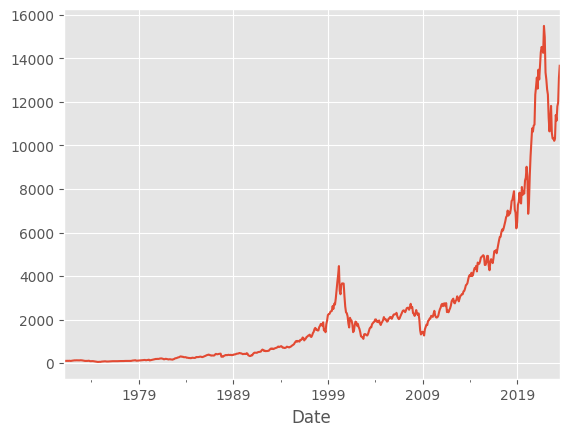

In [134]:
nasdaq['Close'].resample('M').min().plot()

<Axes: xlabel='Date'>

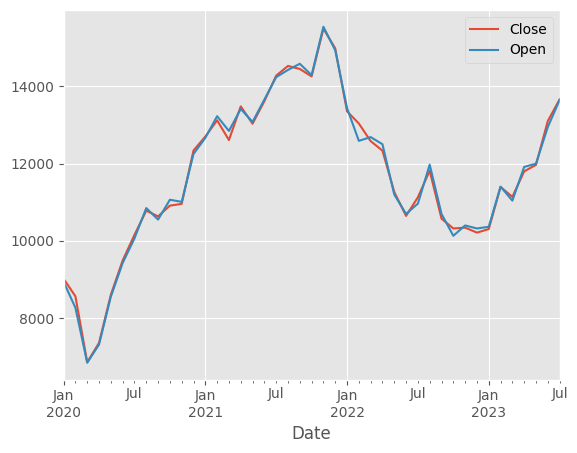

In [135]:
nasdaq[['Close','Open']]['2020':].resample('M').min().plot()

**Using `agg` with Resampling**

In [136]:
# removing redundant col AdjClose
nasdaq.drop('Adj Close',axis=1,inplace=True)

In [137]:
nasdaq['2002-05-01':'2004-06-01'].resample('M').agg({'High':'max',
                                                     'Low':'min',
                                                     'Open':'mean',
                                                     'Close':'mean',
                                                     'Volume':'sum',})

,High,Low,Open,Close,Volume
Date,,,,,
2002-05-31,1759.329956,1560.290039,1666.420910,1660.310913,39802810000
2002-06-30,1621.500000,1375.530029,1506.029004,1505.488489,36638230000
2002-07-31,1459.839966,1192.420044,1350.831826,1346.085455,45237670000
2002-08-31,1426.760010,1205.680054,1326.922724,1327.360463,31490760000
2002-09-30,1347.270020,1160.069946,1256.135492,1251.069006,29029680000
2002-10-31,1347.579956,1108.489990,1236.335651,1241.912178,38730160000
2002-11-30,1497.439941,1313.719971,1402.871991,1409.151001,35673650000
2002-12-31,1521.439941,1327.189941,1392.419521,1387.151908,29122630000
2003-01-31,1467.349976,1303.640015,1389.808106,1389.559518,30898030000


<Axes: xlabel='Date'>

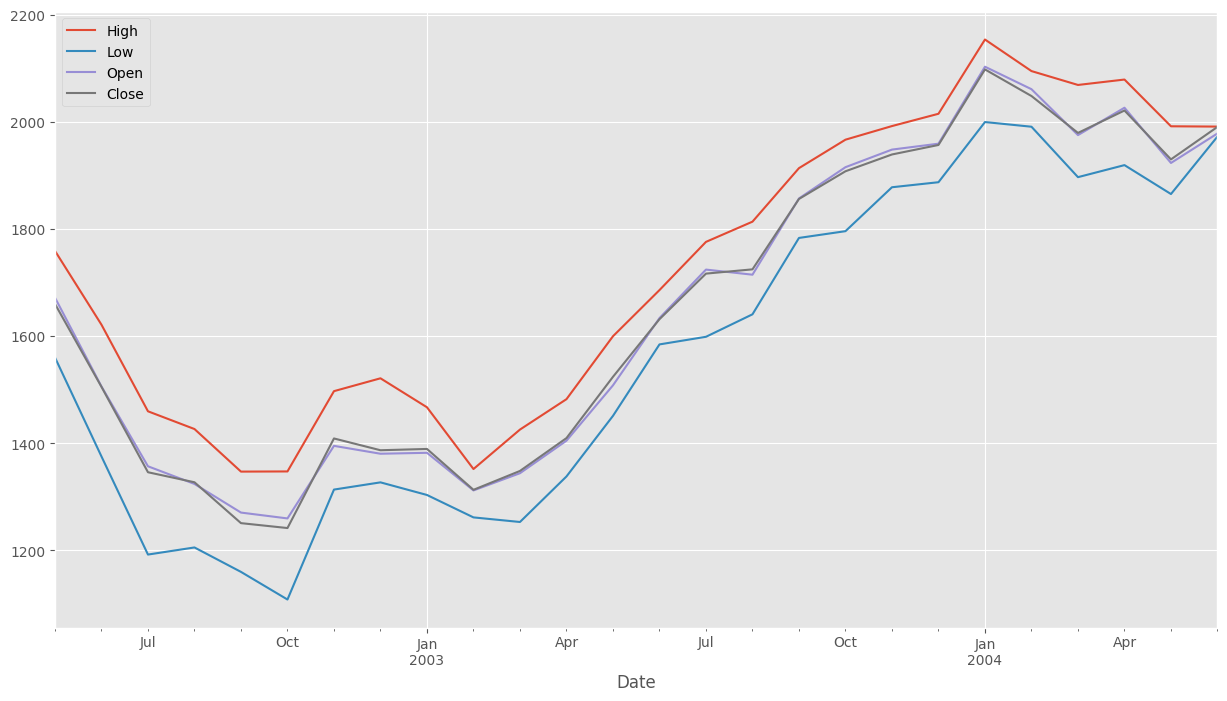

In [138]:
nasdaq['2002-05-01':'2004-06-01'].resample('M').agg({'High':'max',
                                                     'Low':'min',
                                                     'Open':'median',
                                                     'Close':'mean'})\
                                                     .plot(figsize=(15,8))

## Advanced Pandas

**Merging Dataframes**

**Pivot Tables**

In [144]:
test_df.pivot(index='id',columns='isStudent').head()

name                   age        gender          \
isStudent          False           True  False True    False   True    
id                                                                     
100001        Joe Steele             NaN  63.0   NaN  Female     NaN   
100002               NaN      Emma Payne   NaN  43.0     NaN  Female   
100003               NaN  Charlie Steele   NaN  21.0     NaN  Female   
100004               NaN    Emily Steele   NaN  60.0     NaN  Female   
100005     Emma Chalamet             NaN  39.0   NaN    Male     NaN   

            country            height          ... grade        birthdate  \
isStudent     False     True    False   True   ... False True       False   
id                                             ...                          
100001     Pakistan       NaN  166.24     NaN  ...     D   NaN 1973-08-31   
100002          NaN  Scotland     NaN  153.72  ...   NaN     E        NaT   
100003          NaN   Ireland     NaN  163.97  ...   NaN     A        NaT   
100004          NaN  Emirates     NaN  172.11  ...   NaN     F        NaT   
100005      Ireland       NaN  182.23     NaN  ...     C   NaN 1998-05-08   

                     first_name          last_name           month           
isStudent      True       False    True      False   True    False    True   
id                                                                           
100001           NaT        Joe      NaN    Steele     NaN  August      NaN  
100002    1970-10-13        NaN     Emma       NaN   Payne     NaN  October  
100003    1972-06-20        NaN  Charlie       NaN  Steele     NaN     June  
100004    1984-10-17        NaN    Emily       NaN  Steele     NaN  October  
100005           NaT       Emma      NaN  Chalamet     NaN     May      NaN  

[5 rows x 24 columns]

**Cross Tab**

In [143]:
test_df.head()

,id,name,age,gender,country,height,weight,isStudent,score,grade,birthdate,first_name,last_name,month
0,100001,Joe Steele,63,Female,Pakistan,166.24,94.961548,False,110,D,1973-08-31,Joe,Steele,August
1,100002,Emma Payne,43,Female,Scotland,153.72,51.508408,True,106,E,1970-10-13,Emma,Payne,October
2,100003,Charlie Steele,21,Female,Ireland,163.97,70.602036,True,79,A,1972-06-20,Charlie,Steele,June
3,100004,Emily Steele,60,Female,Emirates,172.11,69.342162,True,73,F,1984-10-17,Emily,Steele,October
4,100005,Emma Chalamet,39,Male,Ireland,182.23,56.874504,False,77,C,1998-05-08,Emma,Chalamet,May


In [146]:
pd.crosstab(test_df['country'],test_df['gender'],
            margins=True)

gender,Female,Male,All
country,,,
America,28,26,54
Egypt,28,25,53
Emirates,14,22,36
England,23,25,48
India,27,35,62
Ireland,24,35,59
Pakistan,25,27,52
Palestine,22,23,45
Scotland,22,24,46


In [147]:
pd.crosstab(test_df['country'],[test_df['gender'],test_df['isStudent']],
            margins=True)

gender    Female       Male       All
isStudent  False True False True     
country                              
America       14   14    11   15   54
Egypt         14   14    13   12   53
Emirates       4   10    11   11   36
England       12   11    15   10   48
India         11   16    18   17   62
Ireland       14   10    22   13   59
Pakistan      13   12    16   11   52
Palestine     14    8    11   12   45
Scotland       8   14    10   14   46
Wales         16    8    10   11   45
All          120  117   137  126  500

In [148]:
pd.crosstab([test_df['country'],test_df['isStudent']],
            test_df['gender'],margins=True)

gender               Female  Male  All
country   isStudent                   
America   False          14    11   25
          True           14    15   29
Egypt     False          14    13   27
          True           14    12   26
Emirates  False           4    11   15
          True           10    11   21
England   False          12    15   27
          True           11    10   21
India     False          11    18   29
          True           16    17   33
Ireland   False          14    22   36
          True           10    13   23
Pakistan  False          13    16   29
          True           12    11   23
Palestine False          14    11   25
          True            8    12   20
Scotland  False           8    10   18
          True           14    14   28
Wales     False          16    10   26
          True            8    11   19
All                     237   263  500

In [149]:
pd.crosstab(test_df['country'],test_df['gender'],
            values=test_df['score'],
            aggfunc=np.mean,
            margins=True)

gender,Female,Male,All
country,,,
America,99.000000,99.846154,99.407407
Egypt,100.571429,98.560000,99.622642
Emirates,90.785714,102.045455,97.666667
England,96.260870,102.360000,99.437500
India,98.629630,103.314286,101.274194
Ireland,102.083333,95.228571,98.016949
Pakistan,99.640000,94.037037,96.730769
Palestine,104.045455,100.652174,102.311111
Scotland,98.090909,100.666667,99.434783


In [150]:
pd.crosstab(test_df['country'],[test_df['gender'],test_df['isStudent']],
            values=test_df['score'],
            aggfunc=np.mean)

gender         Female                    Male            
isStudent       False       True        False       True 
country                                                  
America     99.500000   98.500000   96.545455  102.266667
Egypt      100.357143  100.785714   96.923077  100.333333
Emirates    97.500000   88.100000  101.909091  102.181818
England     90.500000  102.545455  103.000000  101.400000
India      102.727273   95.812500  102.888889  103.764706
Ireland    100.785714  103.900000   94.454545   96.538462
Pakistan   102.307692   96.750000   93.000000   95.545455
Palestine  102.214286  107.250000   97.181818  103.833333
Scotland   103.625000   94.928571  102.500000   99.357143
Wales       99.937500   95.250000  105.100000  100.909091